In this notebook, an generalized code has been given that could run on each and every stock*. 

The only changes you have to do :
- Choose the dataset you want
- Change the length of the dataset according to your system performance


In the end, some important points for imroving the performance of your RNN is also given

In [1]:
# RNN
import pandas as pd
import random
import os
import copy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
print(__version__) 
import cufflinks as cf
# For Notebooks
init_notebook_mode(connected=True)
# For offline use
cf.go_offline()

4.5.1


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

price-volume-data-for-all-us-stocks-etfs



In [3]:
dataset = pd.read_csv('../input/price-volume-data-for-all-us-stocks-etfs/Stocks/aaxn.us.txt')
dataset.head()

,Date,Open,High,Low,Close,Volume,OpenInt
0,2005-02-25,13.95,13.96,13.31,13.38,4226243,0
1,2005-02-28,13.31,13.70,12.53,13.01,6417857,0
2,2005-03-01,13.02,13.35,12.97,13.18,3367464,0
3,2005-03-02,13.07,13.99,13.05,13.50,5449390,0
4,2005-03-03,15.08,15.44,14.12,14.22,15074138,0


In [4]:
# Creating an numpy arrray of dataset
training_set = dataset.iloc[:,0:2]

In [5]:
training_set

,Date,Open
0,2005-02-25,13.95
1,2005-02-28,13.31
2,2005-03-01,13.02
3,2005-03-02,13.07
4,2005-03-03,15.08
...,...,...
3196,2017-11-06,23.40
3197,2017-11-07,23.20
3198,2017-11-08,22.62
3199,2017-11-09,21.31


Interactive plot of complete dataset

In [6]:
training_set.iplot(kind='line',y='Open',x='Date')

We have to choose the training set accordingly where we can find significant shift in the stock prices. If your system has high computational power, take the whole dataset

In [7]:
training_set = dataset.iloc[2000:-20,0:2]

In [8]:
training_set.iplot(kind='line',y='Open',x='Date')

In [9]:
# feature scaling
training_set = dataset.iloc[2000:-20,1:2].values
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
training_set = mms.fit_transform(training_set)

In [10]:
X_train = []
y_train = []

# creating a time series:     use timesteps --> 100 
time_step = 100;
for i in range(time_step,len(training_set)):
    X_train.append(training_set[i-time_step:i,0])
    y_train.append(training_set[i,0])

#converting list into array
X_train = np.array(X_train);y_train = np.array(y_train)

# We know that LSTM layer takes 3 dimentional array
#The LSTM input layer must be 3D.
#The meaning of the 3 input dimensions are: samples, time steps, and features.
X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))


In [11]:
X_train.shape

(1081, 100, 1)

In [12]:
#Building an rnn

#importing the keras libraries
from keras.models import Sequential
from keras.layers import Dropout,Dense,LSTM


Using TensorFlow backend.


In [13]:
#adding layers
regressor = Sequential()
regressor.add(LSTM(units=200,return_sequences = True,input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=200,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=200,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=200,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=100))
regressor.add(Dropout(0.2))

#output layer
regressor.add(Dense(units=1))

regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [14]:
regressor.fit(X_train,y_train,epochs=100,batch_size=80)

Epoch 1/100
1081/1081 [==============================] - 23s 21ms/step - loss: 0.1301
Epoch 2/100
1081/1081 [==============================] - 20s 18ms/step - loss: 0.0240
Epoch 3/100
1081/1081 [==============================] - 19s 18ms/step - loss: 0.0146
Epoch 4/100
1081/1081 [==============================] - 20s 18ms/step - loss: 0.0100
Epoch 5/100
1081/1081 [==============================] - 20s 18ms/step - loss: 0.0083
Epoch 6/100
1081/1081 [==============================] - 20s 18ms/step - loss: 0.0077
Epoch 7/100
1081/1081 [==============================] - 21s 19ms/step - loss: 0.0074
Epoch 8/100
1081/1081 [==============================] - 20s 19ms/step - loss: 0.0074
Epoch 9/100
1081/1081 [==============================] - 19s 18ms/step - loss: 0.0074
Epoch 10/100
1081/1081 [==============================] - 20s 18ms/step - loss: 0.0060
Epoch 11/100
1081/1081 [==============================] - 21s 19ms/step - loss: 0.0057
Epoch 12/100
1081/1081 [============================

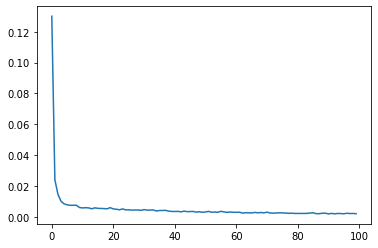

In [15]:
losses = regressor.history.history
losses = pd.DataFrame(losses)
losses['loss'].plot()

In [16]:
dataset_test  = dataset.iloc[-20:,1:2]

In [17]:
real_stocks = dataset_test['Open'].values

In [18]:
dataset_total =dataset.iloc[:,1:2].values

In [19]:
dataset_total = mms.transform(dataset_total)

In [20]:
time_step=100
prediction_stocks = []
# creating a time series:     use timesteps --> 80 
for i in range(len(dataset_total)-20,len(dataset_total)):
    prediction_stocks.append(dataset_total[i-time_step:i])

In [21]:
prediction_stocks = np.array(prediction_stocks)

In [22]:
prediction_stocks = np.reshape(prediction_stocks,(prediction_stocks.shape[0],prediction_stocks.shape[1],1))
predictions = regressor.predict(prediction_stocks)
predictions = mms.inverse_transform(predictions)

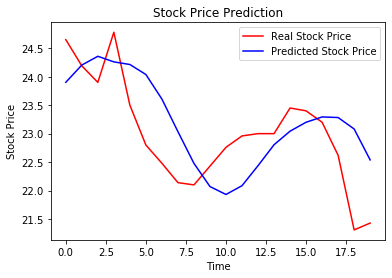

In [23]:
#visulising the results

plt.plot(real_stocks, color = 'red', label = 'Real Stock Price')
plt.plot(predictions, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [24]:
R = pd.DataFrame(real_stocks)
P = pd.DataFrame(predictions)
Data = pd.concat([R,P],axis=1)

In [25]:
Data.columns=['RealStocks','PredictedStocks']

In [26]:
Data[['RealStocks','PredictedStocks']].iplot(kind='spread')

/opt/conda/lib/python3.7/site-packages/cufflinks/plotlytools.py:849: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead

/opt/conda/lib/python3.7/site-packages/cufflinks/plotlytools.py:850: FutureWarning:

The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead



## Improving the performance of your RNN 
- Getting more training data: we trained our model on the past few years, but it would be even better to train it on more data.
- Increasing the number of timesteps: the model remembered the stock prices from the x previous financial days to predict the stock price of the next day. That’s because we chose a number of x timesteps. You could try to increase the number of timesteps, by choosing for example 120 timesteps (6 months).
- Adding some other indicators: if you have the financial instinct that the stock price of some other companies might be correlated to the one that is used in above notebook, you could add this other stock price as a new indicator in the training data.
- Adding more LSTM layers: we built a RNN with four LSTM layers but you could try with even more.
- Adding more neurones in the LSTM layers: we highlighted the fact that we needed a high number of neurones in the LSTM layers to respond better to the complexity of the problem and we chose to include 200 neurones in each of our 4 LSTM layers. You could try an architecture with even more neurones in each of the 4 (or more) LSTM layers.